In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
import matplotlib.pyplot as plt

In [2]:
mu = 1.96197e-13


In [3]:
file = open("2018-11-18_01.txt", "r")
data = []
x = []
line = ""
n = 0
while (not line.startswith("0%") ):
    line = file.readline().rstrip("\n\r")
    if line.startswith("maxi:"):
        n = int(line.split()[1])
        
line += file.readline().rstrip("\n\r")
lsplit = line.split()
x.append(float(lsplit[0][:-2]))
data.append([float(lsplit[2]),float(lsplit[5]),float(lsplit[7])])

while ( lsplit[0] != "100%:"):
    line = file.readline().rstrip("\n\r")
    line += file.readline().rstrip("\n\r")
    lsplit = line.split()
    x.append(float(lsplit[0][:-2]))
    data.append([float(lsplit[2]),float(lsplit[5]),float(lsplit[7])])
    
data = np.array(data)
x = np.array(x)
print(data.shape, x.shape)

(51, 3) (51,)


`data`-array contains `[mean, var, var_var]`  



`[x:]` --> cutting of first two values  where offset is still huge

In [4]:
mean = data[:,0]
var = data[:,1]
#delta_mean = np.subtract(mean,mu)
cutoff = 2
x_nbr = x[cutoff:]
mean = mean[cutoff:]
var = var[cutoff:]
#x_nbr = x_nbr*n/x_nbr[-1]
n = x_nbr*n/x_nbr[-1]
yError = np.sqrt(var)
#yError = data[cutoff:,1]*10**5
#print(yError)
#print(mean-mu)
print(x_nbr.shape,mean.shape,yError.shape)

print(var)


(49,) (49,) (49,)
[6.44379e-22 6.47040e-22 6.47695e-22 6.45445e-22 6.45789e-22 6.44907e-22
 6.44485e-22 6.44262e-22 6.46043e-22 6.46433e-22 6.46421e-22 6.46057e-22
 6.45741e-22 6.45963e-22 6.46262e-22 6.46071e-22 6.46002e-22 6.46472e-22
 6.46812e-22 6.46774e-22 6.46299e-22 6.46255e-22 6.46180e-22 6.46086e-22
 6.45686e-22 6.45720e-22 6.45820e-22 6.45954e-22 6.45664e-22 6.45814e-22
 6.45793e-22 6.45904e-22 6.45914e-22 6.45805e-22 6.45496e-22 6.45448e-22
 6.45746e-22 6.45887e-22 6.45921e-22 6.46173e-22 6.46104e-22 6.46196e-22
 6.46162e-22 6.46269e-22 6.46244e-22 6.46243e-22 6.46133e-22 6.45978e-22
 6.45850e-22]


$y_{err}$ is the standard deviation

$$y_{err} = \sqrt{\mathtt{Var}(y)} =   \sqrt { \frac { \sum _ { i = 1 } ^ { N } \left( x _ { i } - \overline { x } \right) ^ { 2 } } { N - 1 } }$$

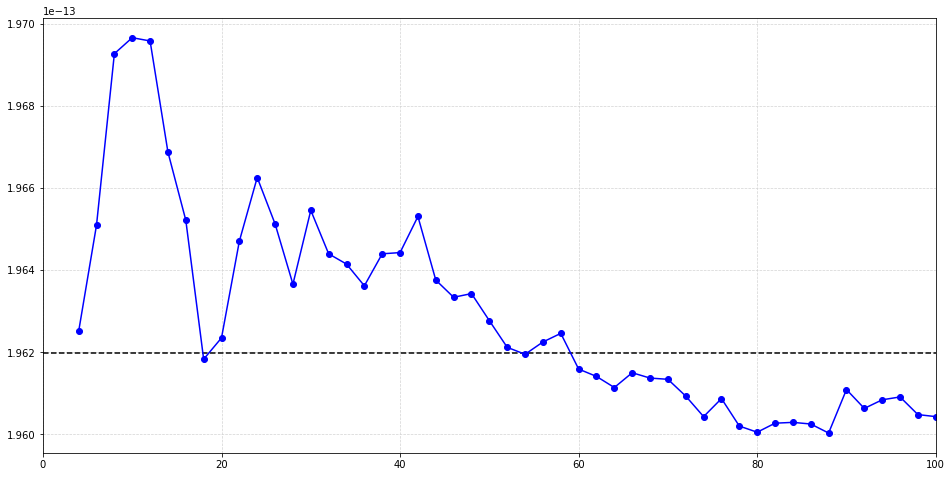

In [5]:
plt.figure(figsize=(16,8))
plt.xlim(0, x_nbr[-1])
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.hlines(mu,0, x_nbr[-1], linestyle = 'dashed')
#plt.errorbar(x_nbr, mean, yerr=yError, fmt='o')
plt.plot(x_nbr, mean, color = 'b', marker = 'o', linestyle= 'solid')
plt.show()


###  Intervallschätzung
#### für $\alpha = 0.99$

Für den Spezialfall einer Normalverteilung können wir exakte Konfidenzintervalle angeben:  
Für $\mu$, wenn $\sigma^2$ bekannt ist:
$$ \left[ \overline { X } _ { n } - z _ { \frac { 1 + \gamma } { 2 } } \sqrt { \frac { \sigma ^ { 2 } } { n } } , \overline { X } _ { n } + z _ { \frac { 1 + \gamma } { 2 } } \sqrt { \frac { \sigma ^ { 2 } } { n } } \right] $$  

<br>

Für $\mu$ wenn $\sigma^2$ unbekannt ist:
$$\left[ \overline { X } _ { n } - t _ { n - 1 ; \frac { 1 + \gamma } { 2 } } \sqrt { \frac { S _ { n } ^ { 2 } } { n } } , \overline { X } _ { n } + t _ { n - 1 ; \frac { 1 + \gamma } { 2 } } \sqrt { \frac { S _ { n } ^ { 2 } } { n } } \right]$$  
Tabelle nur bis $n = 120$, danach $n = \infty$ verwendet. [Table](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values)  
$\dfrac{1-\gamma}{2} = \dfrac{1.99}{2} = 0.995  \quad \Longrightarrow \quad t_{\infty, 0.995} = 2.576$

<br>

für $\sigma^2$:
$$\left[ \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \chi _ { n - 1 ; \frac { 1 + \gamma } { 2 } } ^ { 2 } } , \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \chi _ { n - 1 ; \frac { 1 - \gamma } { 2 } } ^ { 2 } } \right]$$

In [6]:
t_quantile = 2.576
#mean_est = np.array([mean - t_quantile*np.sqrt(var/n), mean + t_quantile*np.sqrt(var/n)]).transpose()
mean_deviation = t_quantile*np.sqrt(var/n)
print(mean_deviation.shape)


(49,)


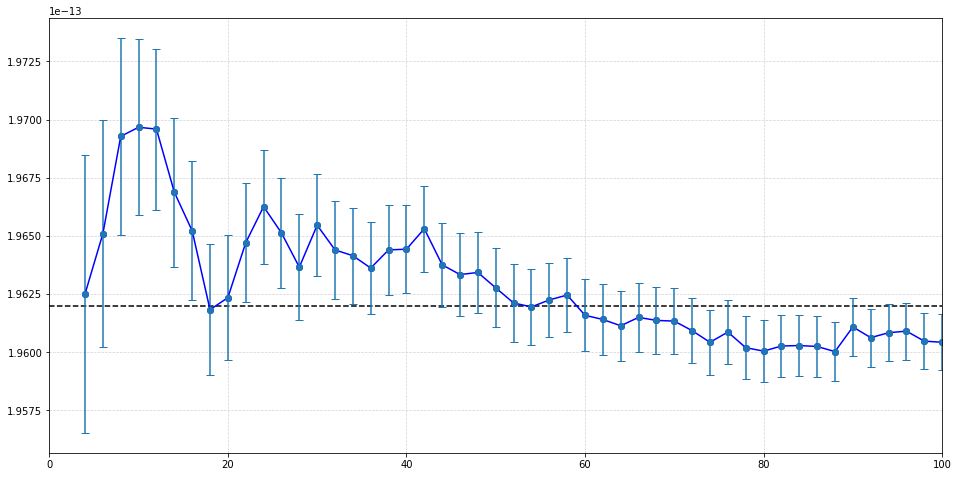

In [7]:
plt.figure(figsize=(16,8))
plt.xlim(0, x_nbr[-1])
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.hlines(mu,0, x_nbr[-1], linestyle = 'dashed')
plt.errorbar(x_nbr, mean, yerr = mean_deviation, fmt= 'o', capsize=4)
plt.plot(x_nbr, mean, color = 'b', marker = 'o', linestyle= 'solid')
plt.show()

### Tests


Für den Mittelwert einer Normalverteilung, wenn $\sigma^2$ unbekannt ist:
$$T = \frac { \overline { X } _ { n } - \mu _ { 0 } } { \sqrt { S _ { n } ^ { 2 } / n } }$$  

$H _ { 0 } : \mu \leq \mu _ { 0 } $ gegen $ H _ { 1 } : \mu > \mu _ { 0 } : $ verwerfen, wenn $ T > t _ { n - 1 ; 1 - \alpha }$  
$H _ { 0 } : \mu \geq \mu _ { 0 } $ gegen $ H _ { 1 } : \mu < \mu _ { 0 } : $ verwerfen, wenn $ T < - t _ { n - 1 ; 1 - \alpha }$  
$H _ { 0 } : \mu = \mu _ { 0 } $ gegen $ H _ { 1 } : \mu \neq \mu _ { 0 } : $ verwerfen, wenn $ | T | > t _ { n - 1 ; 1 - \alpha / 2 }$

<br><br>  

Für die Varianz einer Normalverteilung:
$$T = \frac { ( n - 1 ) S _ { n } ^ { 2 } } { \sigma _ { 0 } ^ { 2 } }$$

$H _ { 0 } : \sigma ^ { 2 } \geq \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } < \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T < \chi _ { n - 1 ; \alpha } ^ { 2 }$  
$H _ { 0 } : \sigma ^ { 2 } = \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } \neq \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T > \chi _ { n - 1 ; 1 - \alpha / 2 } ^ { 2 } $ oder $ T < \chi _ { n - 1 ; \alpha / 2 } ^ { 2 }$  
$H _ { 0 } : \sigma ^ { 2 } \leq \sigma _ { 0 } ^ { 2 } $ gegen $ H _ { 1 } : \sigma ^ { 2 } > \sigma _ { 0 } ^ { 2 } : $ verwerfen, wenn $ T > \chi _ { n - 1 ; 1 - \alpha } ^ { 2 }$

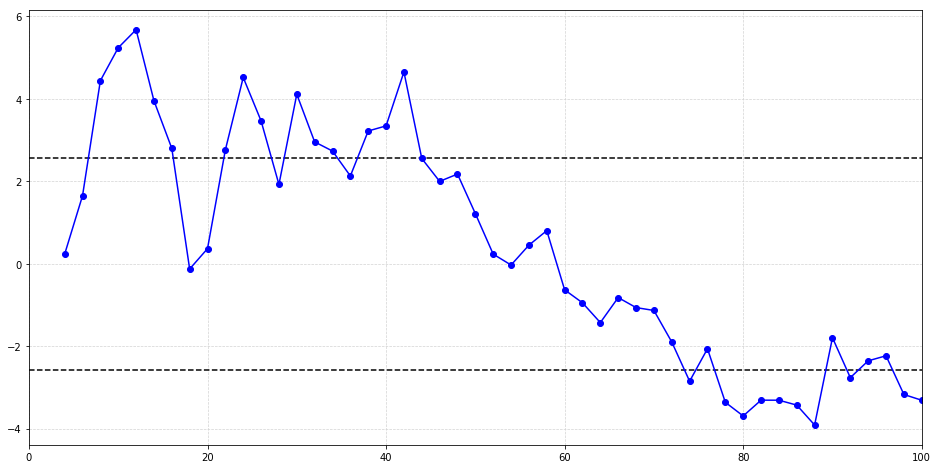

In [8]:
T = (mean-mu)/np.sqrt(var/n)
plt.figure(figsize=(16,8))
plt.xlim(0, x_nbr[-1])
plt.grid(color='lightgray', linestyle='--', linewidth=0.7)
plt.hlines(t_quantile, 0, x_nbr[-1], linestyle = 'dashed')
plt.hlines(-t_quantile, 0, x_nbr[-1], linestyle = 'dashed')
plt.plot(x_nbr, T, color = 'b', marker = 'o', linestyle= 'solid')
plt.show()